### Feature Engineering

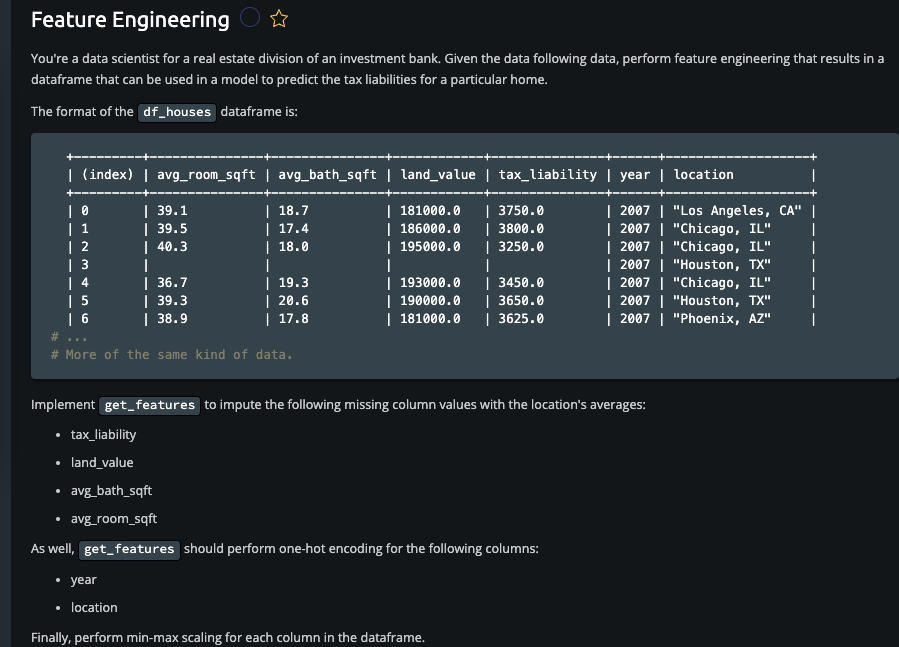

In [ ]:
import numpy as np
import pandas as pd

def ohe_column(df, column_name):
    encoded_variable = pd.get_dummies(df[column_name])
    df = df.join(encoded_variable)
    df = df.drop([column_name], axis=1)

    return df
    
def impute_values_by_location(df, column_name):
    impute_indices = df.iloc[np.argwhere(df[column_name].isnull().values).ravel()].index.values
    impute_locations = df.iloc[impute_indices]['location'].values
    impute_values = df.groupby('location').mean()[column_name]

    df.iloc[impute_indices, df.columns.get_loc(column_name)] = impute_values[impute_locations].values

    return df

def get_features(df_houses):
    df_houses = impute_values_by_location(df_houses, 'tax_liability')
    df_houses = impute_values_by_location(df_houses, 'land_value')
    df_houses = impute_values_by_location(df_houses, 'avg_bath_sqft')
    df_houses = impute_values_by_location(df_houses, 'avg_room_sqft')

    df_houses = ohe_column(df_houses, 'year')
    df_houses = ohe_column(df_houses, 'location')

    df_houses = (df_houses - df_houses.min()) / (df_houses.max() - df_houses.min())
    
    return df_houses